<a href="https://colab.research.google.com/github/ihsanalhafiz/annda/blob/main/Lab1a_ANNDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.1.1 Generation of linearly-separable data

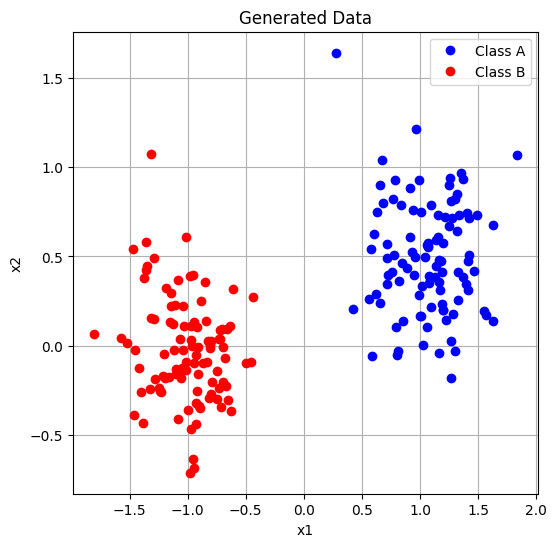

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generate data ---
n = 100

mA = np.array([1.0, 0.5])
sigmaA = 0.3

mB = np.array([-1.0, 0.0])
sigmaB = 0.3

classA = np.zeros((2, n))
classB = np.zeros((2, n))

classA[0, :] = np.random.randn(n) * sigmaA + mA[0]
classA[1, :] = np.random.randn(n) * sigmaA + mA[1]
classB[0, :] = np.random.randn(n) * sigmaB + mB[0]
classB[1, :] = np.random.randn(n) * sigmaB + mB[1]

# --- Plot the raw data ---
plt.figure(figsize=(6, 6))
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")
plt.title("Generated Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.show()


In [103]:
# Combine classA and classB into a single data matrix
# Each row is one sample: [x1, x2]
X = np.hstack((classA, classB)).T  # shape: (2n x 2)
# For perceptron, Class A label=0, Class B label=1
T_perceptron = np.array([0]*n + [1]*n)  # length 2n
# For delta rule, Class A label=-1, Class B label=1
T_delta = np.array([-1]*n + [1]*n)      # length 2n


### 3.1.2 Classification with a single-layer perceptron and analysis

#### Initial Decision Boundary

#### classifying the data using perceptron

Perceptron final weights: [-0.2644391  -0.09416285]
Perceptron final bias: 0.0


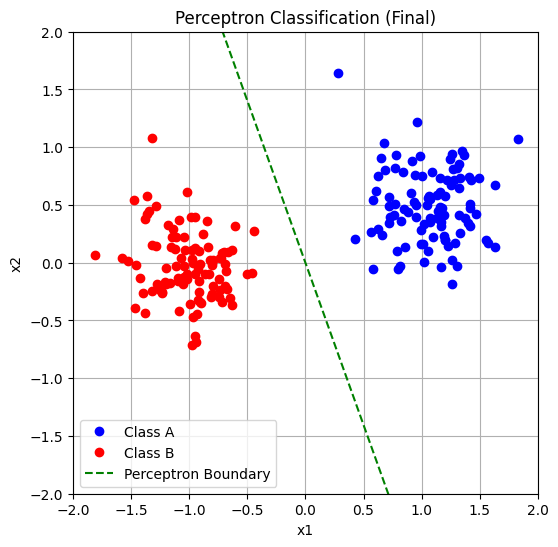

In [104]:
# --- Perceptron Training ---

# Initial weights: [w1, w2, bias]
w_perc = np.array([0.1, 0.2, 0.1])
eta = 0.1
epochs = 50

for epoch in range(epochs):
    # Shuffle data indices each epoch (optional, but often helpful)
    indices = np.random.permutation(2*n)
    
    for i in indices:
        # Augment sample with 1 for bias
        x_aug = np.array([X[i, 0], X[i, 1], 1.0])
        t = T_perceptron[i]
        
        # Perceptron step
        y_out = 1 if np.dot(w_perc, x_aug) > 0 else 0
        # Weight update
        w_perc += eta * (t - y_out) * x_aug

# Final weights and bias
w_perc_final = w_perc[:2]
b_perc_final = w_perc[2]

print("Perceptron final weights:", w_perc_final)
print("Perceptron final bias:", b_perc_final)

# --- Plot Results ---
plt.figure(figsize=(6,6))
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Decision boundary: w1*x + w2*y + b = 0 => y = -(b + w1*x)/w2
x_vals = np.linspace(-2, 2, 200)
if w_perc_final[1] != 0:
    y_vals = -(b_perc_final + w_perc_final[0]*x_vals)/w_perc_final[1]
    plt.plot(x_vals, y_vals, 'g--', label="Perceptron Boundary")

plt.title("Perceptron Classification (Final)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.show()


#### classifying the data using delta rule online learning

Delta rule final weights: [-0.84401838 -0.21184234]
Delta rule final bias: 0.03448853917526769


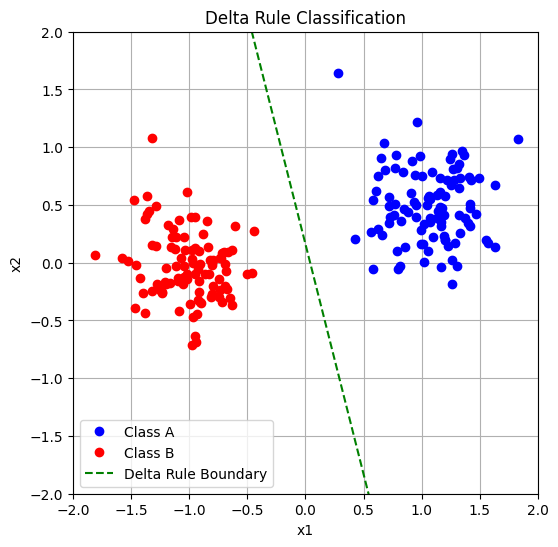

In [105]:
# --- Delta Rule Training ---

# Initialize [w1, w2, bias]
w_delta = np.array([0.1, 0.2, -0.1])
eta = 0.1
epochs = 5

for epoch in range(epochs):
    # Shuffle data indices each epoch (optional)
    indices = np.random.permutation(2*n)
    
    for i in indices:
        x_aug = np.array([X[i, 0], X[i, 1], 1.0])
        t = T_delta[i]  # -1 for class A, +1 for class B
        
        y_lin = np.dot(w_delta, x_aug)  # linear output
        # Delta rule update
        w_delta += eta * (t - y_lin) * x_aug

# Final weights and bias
w_drule_final = w_delta[:2]
b_drule_final = w_delta[2]

print("Delta rule final weights:", w_drule_final)
print("Delta rule final bias:", b_drule_final)

# --- Plot Results ---
plt.figure(figsize=(6,6))
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Decision boundary: w1*x + w2*y + b = 0 => y = -(b + w1*x)/w2
x_vals = np.linspace(-2, 2, 200)
if w_drule_final[1] != 0:
    y_vals = -(b_drule_final + w_drule_final[0]*x_vals)/w_drule_final[1]
    plt.plot(x_vals, y_vals, 'g--', label="Delta Rule Boundary")

plt.title("Delta Rule Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.show()


#### Delta Rule with batch learning


Epoch 1/5, w = [-3.12552479 -0.90173552  0.9047479 ]
Epoch 2/5, w = [ 73.57697797  15.34414514 -11.06702296]
Epoch 3/5, w = [-1704.27393926  -393.8761087     93.60716484]
Epoch 4/5, w = [39784.68499749 10005.9431714   1103.43477335]
Epoch 5/5, w = [-935099.0810854  -251614.78203339  -92031.18603098]

Final Weights (batch Delta Rule): [-935099.0810854  -251614.78203339]
Final Bias (batch Delta Rule): -92031.18603097506


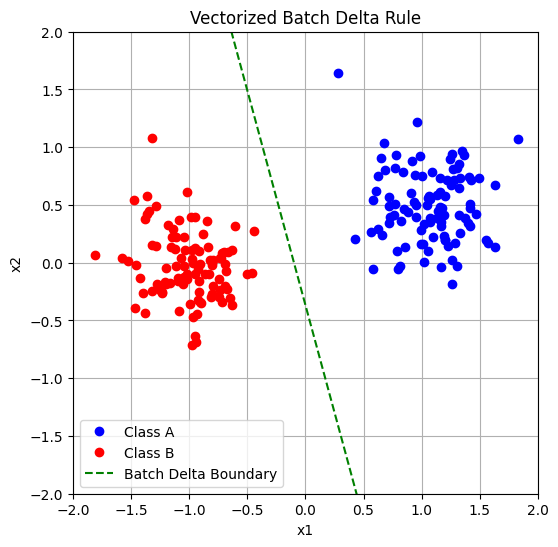

In [106]:
# --------------------------------------
# 2) Create an Augmented Data Matrix X_aug
# --------------------------------------
# We add a column of all ones to represent the bias input
# So X_aug has shape (2n, 3): each row is [x1, x2, 1]
N = X.shape[0]  # 2n
X_aug = np.column_stack((X, np.ones(N)))  # shape: (200, 3)

# ------------------------------
# 3) Vectorized Batch Delta Rule
# ------------------------------
w_batch = np.array([0.1, 0.2, -0.1])  # initial [w1, w2, bias]
eta = 0.1
epochs = 5

for epoch in range(epochs):
    # Forward pass (vectorized): 
    # y_all = X_aug @ w_batch   -> shape: (2n,)
    y_all = X_aug @ w_batch

    # Compute all errors: e = T - y_all
    errors = T - y_all  # shape: (2n,)

    # Sum the individual updates in one vector operation:
    # Delta w = eta * X_aug^T @ errors
    #    X_aug^T shape: (3, 2n)
    #    errors shape: (2n,)
    # => result shape: (3,)
    delta_w_accum = eta * (X_aug.T @ errors)

    # Weight update (one shot per epoch)
    w_batch += delta_w_accum

    # (Optional) Print or store debug info
    print(f"Epoch {epoch+1}/{epochs}, w = {w_batch}")

# Extract final w, bias
w_final = w_batch[:2]
b_final = w_batch[2]

print("\nFinal Weights (batch Delta Rule):", w_final)
print("Final Bias (batch Delta Rule):", b_final)

# ------------------------
# 4) Plot Decision Boundary
# ------------------------
plt.figure(figsize=(6,6))
plt.plot(classA[0, :], classA[1, :], 'bo', label='Class A')
plt.plot(classB[0, :], classB[1, :], 'ro', label='Class B')

x_vals = np.linspace(-2, 2, 200)
if w_final[1] != 0:
    y_vals = -(b_final + w_final[0]*x_vals) / w_final[1]
    plt.plot(x_vals, y_vals, 'g--', label='Batch Delta Boundary')

plt.title("Vectorized Batch Delta Rule")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.show()


#### Batch learning without bias

Epoch 1/10, w = [-3.18668838 -1.36877978]
Epoch 2/10, w = [77.9907729  21.43615289]
Epoch 3/10, w = [-1841.44568475  -489.31473845]
Epoch 4/10, w = [43390.73197014 11493.59446631]
Epoch 5/10, w = [-1022236.00876903  -270712.84791591]
Epoch 6/10, w = [24082374.87874874  6377472.97392488]
Epoch 7/10, w = [-5.67344622e+08 -1.50243470e+08]
Epoch 8/10, w = [1.33657869e+10 3.53951000e+09]
Epoch 9/10, w = [-3.14877857e+11 -8.33855365e+10]
Epoch 10/10, w = [7.41804919e+12 1.96443795e+12]

Final weights (no bias): [7.41804919e+12 1.96443795e+12]


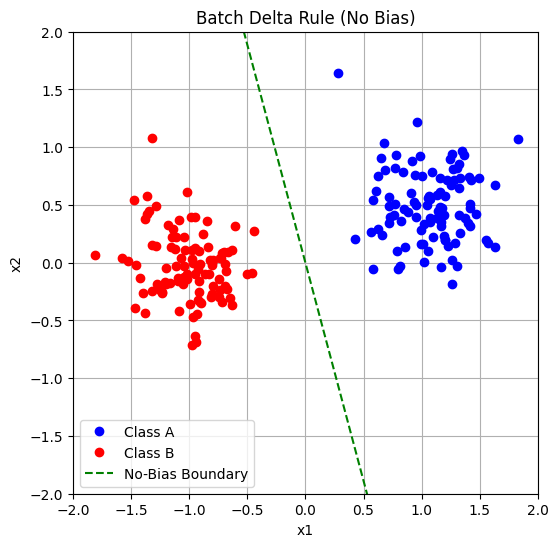

In [107]:
# ------------------------------------
#  Batch Delta Rule (No Bias)
# ------------------------------------

# Initial weights (no bias)
w = np.array([0.1, 0.2])  # shape: (2,)

eta = 0.1   # learning rate
epochs = 10
N = X.shape[0]  # 2n

for epoch in range(epochs):
    # Forward pass (vectorized)
    # y_all has shape (2n,)
    y_all = X @ w   # matrix-vector product

    # Compute errors
    errors = T - y_all  # shape: (2n,)

    # Batch update: sum over all samples
    # X^T has shape (2, 2n), errors shape (2n,)
    # => delta_w has shape (2,)
    delta_w = eta * (X.T @ errors)

    # Update weights once per epoch
    w += delta_w

    print(f"Epoch {epoch+1}/{epochs}, w = {w}")

w_final = w
print("\nFinal weights (no bias):", w_final)
# ------------------------------------
#  Plot Decision Boundary (No Bias)
# ------------------------------------
plt.figure(figsize=(6,6))
plt.plot(classA[0, :], classA[1, :], 'bo', label='Class A')
plt.plot(classB[0, :], classB[1, :], 'ro', label='Class B')

# Decision boundary: w1*x + w2*y = 0 -> y = - (w1/w2)*x
x_vals = np.linspace(-2, 2, 200)
if w_final[1] != 0:
    slope = -w_final[0]/w_final[1]
    y_vals = slope * x_vals
    plt.plot(x_vals, y_vals, 'g--', label='No-Bias Boundary')

plt.title("Batch Delta Rule (No Bias)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.show()


### 3.1.3 Classification of samples that are not linearly separable

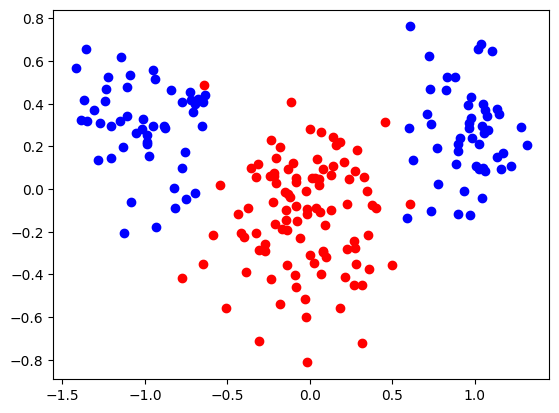

In [108]:
import numpy as np
import matplotlib.pyplot as plt

ndata = 100
mA = np.array([1.0, 0.3])
sigmaA = 0.2
mB = np.array([0.0, -0.1])
sigmaB = 0.3

# Initialize classA and classB
classA = np.zeros((2, ndata))
classB = np.zeros((2, ndata))

# classA - First dimension: half shifted negatively, half shifted positively
classA[0, :] = np.concatenate((
    np.random.randn(round(0.5 * ndata)) * sigmaA - mA[0],
    np.random.randn(round(0.5 * ndata)) * sigmaA + mA[0]
))

# classA - Second dimension
classA[1, :] = np.random.randn(ndata) * sigmaA + mA[1]

# classB - First and second dimensions
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo')
plt.plot(classB[0, :], classB[1, :], 'ro')
plt.show()


In [ ]:
# Combine classA and classB into a single data matrix
# Each row is one sample: [x1, x2]
X = np.hstack((classA, classB)).T  # shape: (2n x 2)
# For delta rule, Class A label=-1, Class B label=1
T_delta = np.array([-1]*n + [1]*n)      # length 2n


## Left over code

[7.41804919e+12 1.96443795e+12]


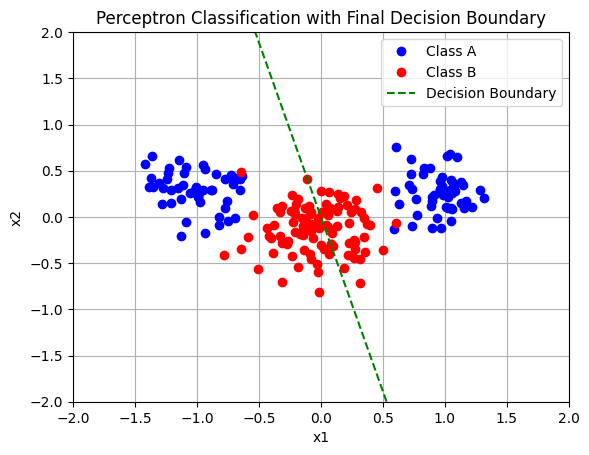

In [109]:
# first perceptron
epochs = 50
for epoch in range(epochs):
    for i in range(n):
        y_quot = classA[0, i] * w[0] + classA[1, i] * w[1] - w0
        y = 1 if y_quot > 0 else 0
        if y == 1:
            w = w - eta * np.array([classA[0, i], classA[1, i]])
        
        y_quot = classB[0, i] * w[0] + classB[1, i] * w[1] - w0
        y = 1 if y_quot > 0 else 0
        if y == 0:
            w = w + eta * np.array([classB[0, i], classB[1, i]])

print(w)
# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Final Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


Final weights: [ 0.04148939 -2.2964471 ]
Final bias: 0.19696370131596927


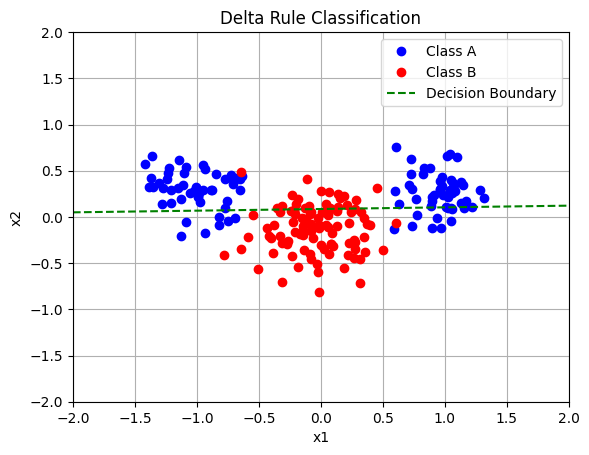

In [110]:
# Suppose you have classA.shape == (2, n) and classB.shape == (2, n).
# Flatten them to shape (n, 2) and stack:
A = classA.T  # shape (n,2)
B = classB.T  # shape (n,2)

X = np.vstack([A, B])         # shape (2n, 2)
T = np.hstack([np.ones(n)*-1.0,   # Class A => 0
               np.ones(n)])   # Class B => 1

# Initialize weights and bias
# We'll store them in a single array of size 3: [w1, w2, bias]
w_matrix = np.array([0.1, 0.2, -0.2])
eta = 0.1  # learning rate

epochs = 50

for epoch in range(epochs):
    idx = np.random.permutation(2*n)  # shuffle
    X = X[idx]
    T = T[idx]
    
    # now do incremental (“online”) updates
    for i in range(2*n):
        x_i = np.array([X[i, 0], X[i, 1], 1.0])  # includes bias=1
        y_i = np.dot(w_matrix, x_i)              # linear output
        t_i = T[i]                               # 0 or 1
        error = t_i - y_i
        delta_w = eta * np.dot(error, x_i)
        w_matrix += delta_w

# Extract final weights and bias
w_deltarule = w_matrix[:2]
w0_deltarule = w_matrix[2]

print("Final weights:", w_deltarule)
print("Final bias:", w0_deltarule)

# Plot the data again
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-2, 2, 200)
if w_deltarule[1] != 0:  # Avoid division by zero
    # Decision boundary given by w1*x + w2*y + bias = 0  =>  y = -bias/w2 - (w1/w2)*x
    y_vals = -(w_deltarule[0] / w_deltarule[1]) * x_vals - (w0_deltarule / w_deltarule[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Delta Rule Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()
